<a href="https://colab.research.google.com/github/AbrahamtheAraiza99/inteligencia-artificial/blob/master/Clasificacion_de_numeros_escritos_a_mano_(Dataset_MNIST)_utilizando_redes_neuronales_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


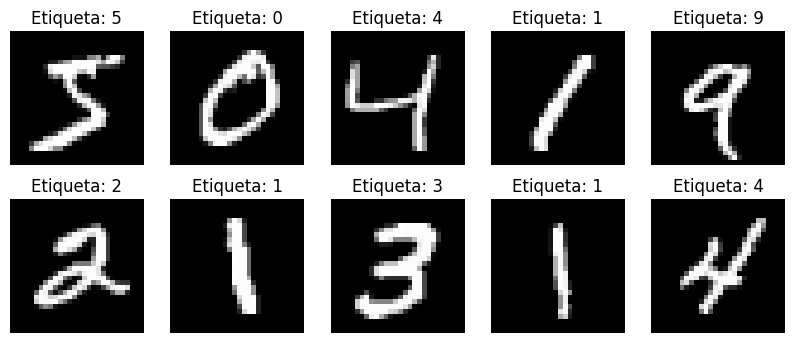

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8717 - loss: 0.4566 - val_accuracy: 0.9682 - val_loss: 0.1171
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9618 - loss: 0.1263 - val_accuracy: 0.9738 - val_loss: 0.0921
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9757 - loss: 0.0834 - val_accuracy: 0.9760 - val_loss: 0.0844
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9812 - loss: 0.0609 - val_accuracy: 0.9788 - val_loss: 0.0761
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9868 - loss: 0.0447 - val_accuracy: 0.9768 - val_loss: 0.0815
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9723 - loss: 0.0882

🔍 Precisión en datos de prueba: 0.9771
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


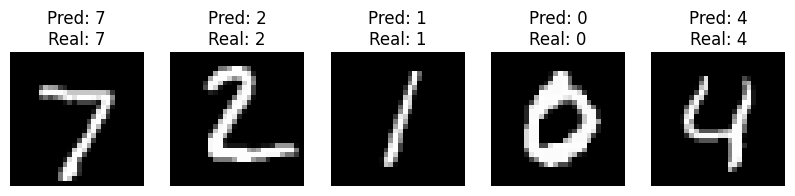

In [1]:
# Paso 1: Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Paso 2: Cargar el dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Paso 3: Visualizar algunos ejemplos
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis('off')
plt.show()

# Paso 4: Preprocesar los datos
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Paso 5: Crear la red neuronal
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Paso 6: Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Paso 7: Entrenar el modelo
history = model.fit(x_train, y_train_cat,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.1)

# Paso 8: Evaluar el modelo en datos de prueba
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print(f"\n🔍 Precisión en datos de prueba: {test_accuracy:.4f}")

# Paso 9: Predecir nuevos datos y mostrar ejemplos
predictions = model.predict(x_test)

# Mostrar 5 predicciones
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}\nReal: {y_test[i]}")
    plt.axis('off')
plt.show()
